In [12]:
import numpy as np
import matplotlib.pyplot as plt

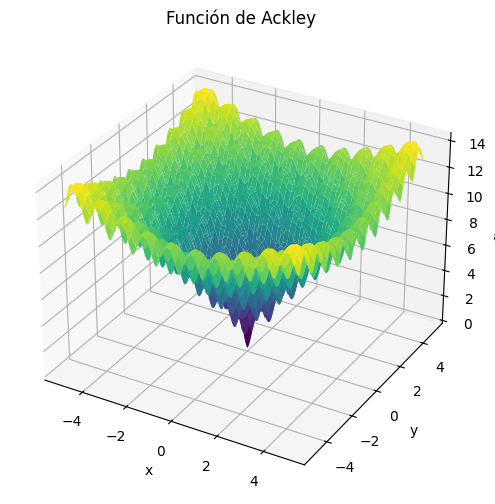

In [13]:
# Definición de la función de Ackley
def ackley(x, y, a=20, b=0.2, c=2*np.pi):
    term1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))
    return term1 + term2 + a + np.e

# Crear el grid de valores
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)

# Graficar en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_title("Función de Ackley")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

plt.show()


In [14]:
def crear_poblacion_binaria(n, l): 
    # n: numero de individuos
    # l: longitud de la representación binaria
    Poblacion =  np.random.randint(0, 2, size=(n, l))
    return Poblacion

In [15]:
# Función para decodificar una cadena binaria de 24 bits a dos reales (12 bits cada uno)
def decodificarPares(c, L, Imin, Imax):
    # c: cadena binaria
    # L: longitud de la representación binaria (debe ser par)
    # Imin: Intervalo minimo 
    # Imax: Intervalo maximo

    [r, v] = c.shape # r: numero de individuos, c: longitud de la representación binaria    

    matrizFinal = np.zeros([r, 2])  # Matriz para almacenar los pares decodificados

    for i in range(r):
        
        mitad = L // 2
        x_bin = c[i][:mitad]
        y_bin = c[i][mitad:]

        x_decimal = (sum(bit * 2 ** (mitad - idx - 1) for idx, bit in enumerate(x_bin)))
        y_decimal = (sum(bit * 2 ** (mitad - idx - 1) for idx, bit in enumerate(y_bin)))

        # REESCALAMIENTO

        x_rescalado = (Imax - Imin) * x_decimal / (2 ** mitad - 1) + Imin
        y_rescalado = (Imax - Imin) * y_decimal / (2 ** mitad - 1) + Imin


        matrizFinal[i] = [x_rescalado, y_rescalado]

    return matrizFinal

In [16]:
def fitnessPares(poblacion, L, Imin, Imax):
    D = decodificarPares(poblacion, L, Imin, Imax)
    [r,c] = D.shape
    x = D[:, 0]
    y = D[:, 1]
    fitness = []
    
    for x, y in D:  # Python automáticamente desempaqueta cada fila
        fitness.append(ackley(x, y))
    
    return np.array(fitness)

In [17]:
def cruzar(poblacion, pc):
    [r, c] = poblacion.shape
    # pc : Pares de cromosomas a cruzar
    mitad = c // 2
    M = np.zeros((int(2 * pc), c)) # Matriz auxiliar para guardar los descendientes para guardar el doble 
    # de la población a cruzar
    for i in range(int(pc)):
        r1 = np.random.randint(0, r, size=(1, 2)) # Selección aleatoria de dos padres
        
        # Seleccionamos los padres a cruzar
        padre1 = poblacion[r1[0, 0], :]
        padre2 = poblacion[r1[0, 1], :]

        # Selección del punto de cruza
        r2 = np.random.randint(0, mitad)

        # Se crean los desendientes
        hijo1 = np.concatenate((padre1[0:r2], padre2[r2:]))
        hijo2 = np.concatenate((padre2[0:r2], padre1[r2:]))

        # Se guardan los descendientes en la matriz auxiliar
        M[2 * i, :] = hijo1
        M[2 * i + 1, :] = hijo2
    return M

In [18]:
poblacion = crear_poblacion_binaria(3, 24)
poblacion = cruzar(poblacion, 5)
print(poblacion)

[[1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.]
 [1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.]
 [1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.]
 [1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.]
 [1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.]]


In [19]:
def mutacion(Poblacion, pm):
    # pm: probabilidad de mutación en decimal, no se debe de exeder del 5%
    [r, c] = Poblacion.shape
    n = int(pm * c) 
    for i in range(n):
        r1 = np.random.randint(0, r) # Numero aleatorio para seleccionar cual individuo va mutar
        r2 = np.random.randint(0, c) # Numero aleatorio para seleccionar el gen a mutar (0 o un 1)
        
        # Comparamos el gen del individiuo y lo cambiamos a su contrario 0 -> 1 ^ 1 -> 0
        if (Poblacion[r1, r2] == 0):
            Poblacion[r1, r2] = 1
        else:
            Poblacion[r1, r2] = 0

    return Poblacion

In [20]:
poblacion = crear_poblacion_binaria(3, 12)
print(poblacion)
poblacion = mutacion(poblacion, 0.05)
print(poblacion)

[[1 1 1 0 1 0 0 0 1 0 1 1]
 [0 0 1 1 0 1 1 0 1 0 1 1]
 [0 1 0 1 1 1 0 1 1 0 1 0]]
[[1 1 1 0 1 0 0 0 1 0 1 1]
 [0 0 1 1 0 1 1 0 1 0 1 1]
 [0 1 0 1 1 1 0 1 1 0 1 0]]


In [21]:
# SELECCIÓN POR TORNEO
def seleccionPorToreno(poblacion, Imin, Imax, k, l):
    # k : Indice del tamaño del torneo
    [r, c] = poblacion.shape 
    aptitud = fitnessPares(poblacion, l, Imin, Imax).reshape(r, 1)
    matrizAuxiliar = np.concatenate([poblacion, aptitud], axis= 1)

    indicesTorneo = np.random.choice(r, size = k, replace = False)
    torneo = matrizAuxiliar[indicesTorneo, :]

    # Ordenamos por aptitud
    indices = np.argsort(torneo[:,-1]) # [::-1] ya no es necesario porque minimizamos
    torneoOrdenado = torneo[indices] 

    mejorIndividuo = torneoOrdenado[0, 0:c]

    return mejorIndividuo

In [22]:
# FUNCIÓN QUE CREA UNA NUEVA POBLACIÓN MEDIANTE TORNEO
def nuevaPoblacionTorneo(poblacion, Imin, Imax, k, l):
    [r,c] = poblacion.shape
    pNew = np.zeros((r,c))

    # Se repite el torneo
    for i in range (r):
        pNew[i,:] = seleccionPorToreno(poblacion, Imin, Imax, k, l)
    return pNew

In [27]:
# Implementación del algoritmo genetico
print("Algoritmo genetico: Representación binarria\n")

#***************PARAMETROS DE INICIO*****************************
n = 60             # Cantidad de población
l = 12               # Cantidad de genes
generaciones = 50   # Numero de generaciones a realizar
ps = 0.6            # Porcentaje de selección no aleatoria
pc = n/2            # Pares a cruzar (cruza la mitad)
pm = 0.01            # Porcentaje de mutación (0.1 a 0.5 estandar)
Imin = -5            # Espacio de busqueda minima y de rescalar
Imax = 5            # Espacio de busqueda maxima y de rescalar
k = 10
redondeo = 2

#*****************ALGORITMO GENETICO******************************
poblacion = crear_poblacion_binaria(n, l)
for i in range(generaciones):
    pCruzar = cruzar(poblacion, pc)
    pMutada = mutacion(pCruzar, pm)
    pSelecc = nuevaPoblacionTorneo(pMutada, Imin, Imax, k, l)
    poblacion = pSelecc.copy()

#*****************RESULTADOS*************************************

pMejorDecimal = decodificarPares(pSelecc, l, Imin, Imax)
mejorIndividuo = pMejorDecimal[0]
print(f"El mejor individuo es: {poblacion[0,:]}")
print(f"En decimal es: {mejorIndividuo}")


Algoritmo genetico: Representación binarria

El mejor individuo es: [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
En decimal es: [-0.07936508 -0.07936508]


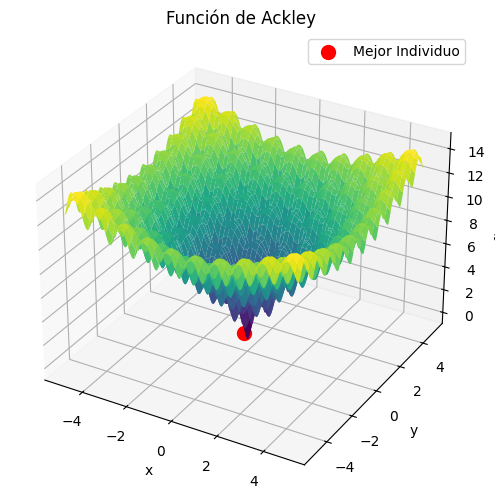

In [28]:
# Graficar en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title("Función de Ackley")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.scatter(mejorIndividuo[0], mejorIndividuo[1], ackley(mejorIndividuo[0], mejorIndividuo[1]), color='r', s=100, label='Mejor Individuo')
ax.legend()
plt.show()